In [8]:
import pandas as pd
import warnings
import mpld3
import matplotlib.pyplot as plt
import ipywidgets as widgets
from folium import folium, plugins
from IPython.display import display 
from ipywidgets import interact

In [9]:
warnings.filterwarnings("ignore")
data = pd.read_csv('docs/conflicts_events_FULL_filtered.csv', low_memory=False)
data

,conflict_id,conflict_name,date_start,date_end,best,deaths_civilians,deaths_unknown,type_of_violence,latitude,longitude,country,region_x
0,329,Ethiopia: Ogaden,2000-01-01T00:00:00,2000-01-23T00:00:00,0,0,0,1,7.000000,44.000000,Ethiopia,4
1,327,Angola: Government,2000-01-01T00:00:00,2000-11-10T00:00:00,0,0,0,1,-13.000000,20.500000,Angola,4
2,364,India: Kashmir,2000-01-01T00:00:00,2000-10-15T00:00:00,153,0,153,1,33.916670,76.666670,India,3
3,386,Algeria: Government,2000-01-01T00:00:00,2000-01-01T00:00:00,2,0,0,1,36.855833,3.866667,Algeria,4
4,352,Chechen Republic of Ichkeria - Civilians,2000-01-01T00:00:00,2000-01-11T00:00:00,0,0,0,3,43.305800,45.747700,Russia (Soviet Union),3
...,...,...,...,...,...,...,...,...,...,...,...,...
5517259,222,Myanmar (Burma): Government,2022-12-31T00:00:00,2022-12-31T00:00:00,0,0,0,1,19.707865,94.689569,Myanmar (Burma),3
5517260,222,Myanmar (Burma): Government,2022-12-31T00:00:00,2022-12-31T00:00:00,0,0,0,1,19.707865,94.689569,Myanmar (Burma),3
5517261,337,Somalia: Government,2022-12-31T00:00:00,2022-12-31T00:00:00,2,0,0,1,-0.358173,42.545365,Somalia,4
5517262,222,Myanmar (Burma): Government,2022-12-31T00:00:00,2022-12-31T00:00:00,1,0,0,1,21.457450,95.391822,Myanmar (Burma),3


In [10]:
print("Número de eventos en todos los datos:", data.shape[0])

Número de eventos en todos los datos: 5517264


In [11]:
conteo_conflictos = data['conflict_id'].value_counts().reset_index()
conteo_conflictos.columns = ['conflict_id', 'conflict_count']

data = data.merge(conteo_conflictos, on='conflict_id')
data


,conflict_id,conflict_name,date_start,date_end,best,deaths_civilians,deaths_unknown,type_of_violence,latitude,longitude,country,region_x,conflict_count
0,329,Ethiopia: Ogaden,2000-01-01T00:00:00,2000-01-23T00:00:00,0,0,0,1,7.000000,44.000000,Ethiopia,4,21142
1,329,Ethiopia: Ogaden,2000-01-01T00:00:00,2000-01-23T00:00:00,0,0,0,1,7.000000,44.000000,Ethiopia,4,21142
2,329,Ethiopia: Ogaden,2000-01-01T00:00:00,2000-12-31T00:00:00,25,0,25,1,7.000000,44.000000,Ethiopia,4,21142
3,329,Ethiopia: Ogaden,2000-01-01T00:00:00,2000-01-23T00:00:00,0,0,0,1,7.000000,44.000000,Ethiopia,4,21142
4,329,Ethiopia: Ogaden,2000-01-01T00:00:00,2000-12-31T00:00:00,25,0,25,1,7.000000,44.000000,Ethiopia,4,21142
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5517259,358,Togo: Government,2022-07-09T00:00:00,2022-07-10T00:00:00,7,7,0,1,10.975000,0.637000,Togo,4,8
5517260,358,Togo: Government,2022-07-15T00:00:00,2022-07-15T00:00:00,1,0,0,1,10.886168,0.681455,Togo,4,8
5517261,358,Togo: Government,2022-07-15T00:00:00,2022-07-15T00:00:00,1,0,0,1,10.886168,0.681455,Togo,4,8
5517262,358,Togo: Government,2022-11-17T00:00:00,2022-11-17T00:00:00,3,0,0,1,10.975560,0.823740,Togo,4,8


In [12]:
data_simplified = data.groupby('conflict_id').agg({    
    'conflict_name': 'first',    
    'conflict_count': 'first',
    'date_start': 'first',
    'date_end': 'last',
    'best': 'sum',
    'deaths_civilians': 'sum',
    'type_of_violence': 'max',
    'latitude': 'mean',
    'longitude': 'mean',
    'country': 'first',
    'region_x': 'first',
}).reset_index()

data_simplified.head()

,conflict_id,conflict_name,conflict_count,date_start,date_end,best,deaths_civilians,type_of_violence,latitude,longitude,country,region_x
0,205,Iran: Kurdistan,817,2016-05-03T00:00:00,2022-11-21T00:00:00,2489,171,1,36.377416,45.322767,Iran,2
1,208,PIJ - Civilians,328,2000-11-02T00:00:00,2021-12-16T00:00:00,1224,1160,3,31.818996,34.938663,Israel,3
2,209,Philippines: Government,102358,2000-02-02T00:00:00,2022-11-30T00:00:00,298107,30378,3,11.856419,119.569161,Philippines,3
3,211,AMB - Civilians,72,2000-12-31T00:00:00,2006-08-13T00:00:00,164,163,3,32.006607,35.119317,Israel,1
4,218,India - Pakistan,22248,2000-01-01T00:00:00,2021-02-03T00:00:00,43308,22518,1,33.489231,74.319313,Pakistan,3


In [217]:
print("Número de filas de todos los datos simplificados:", data_simplified.shape[0])

Número de filas de todos los datos simplificados: 174


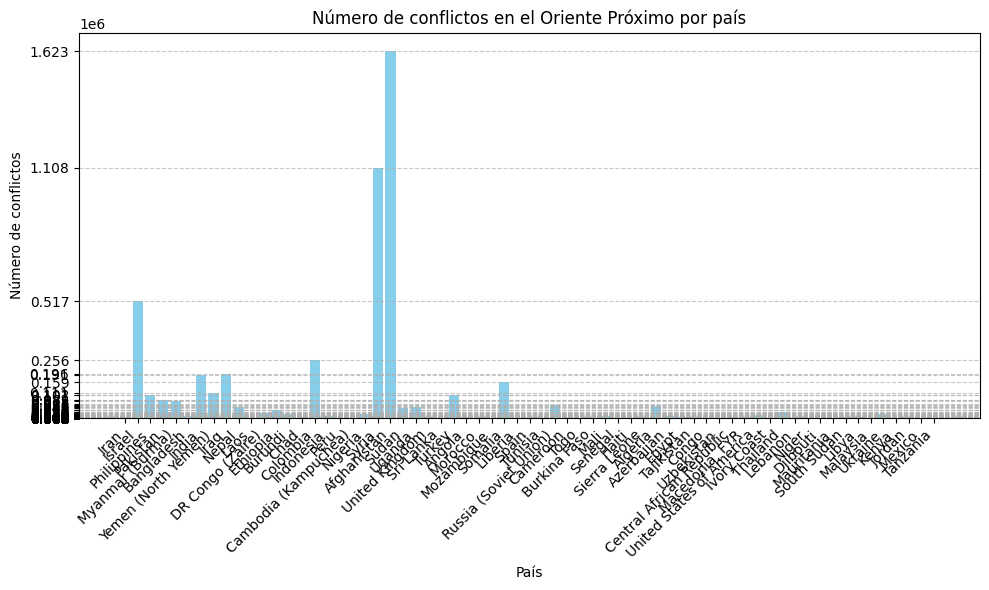

<Figure size 640x480 with 0 Axes>

In [219]:
plt.figure(figsize=(10, 6))
plt.bar(data_simplified['country'], data_simplified['conflict_count'], color='skyblue')
plt.title('Número de conflictos en el Oriente Próximo por país')
plt.xlabel('País')
plt.ylabel('Número de conflictos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Establecer manualmente las etiquetas del eje y
plt.yticks(data_simplified['conflict_count'])

# Mostrar la gráfica
plt.tight_layout()
plt.show()
html_output = mpld3.fig_to_html(plt.gcf())

# Guardar el HTML en un archivo
with open('html/01_conflictos_por_pais.html', 'w') as file:
    file.write(html_output)

In [220]:
paises_oriente_proximo = ['Iran', 'Israel', 'Pakistan', 'Yemen (North Yemen)', 'Iraq', 'Turkey', 'Syria', 'Jordan', 'Lebanon']
data_oriente_proximo = data_simplified[data_simplified['country'].isin(paises_oriente_proximo)]
data_oriente_proximo.head()

,conflict_id,conflict_name,conflict_count,date_start,date_end,best,deaths_civilians,type_of_violence,latitude,longitude,country,region_x
0,205,Iran: Kurdistan,817,2016-05-03T00:00:00,2022-11-21T00:00:00,2489,171,1,36.377416,45.322767,Iran,2
1,208,PIJ - Civilians,328,2000-11-02T00:00:00,2021-12-16T00:00:00,1224,1160,3,31.818996,34.938663,Israel,3
3,211,AMB - Civilians,72,2000-12-31T00:00:00,2006-08-13T00:00:00,164,163,3,32.006607,35.119317,Israel,1
4,218,India - Pakistan,22248,2000-01-01T00:00:00,2021-02-03T00:00:00,43308,22518,1,33.489231,74.319313,Pakistan,3
10,230,Yemen (North Yemen): Government,111216,2009-11-03T00:00:00,2022-12-30T00:00:00,1645140,192220,1,14.880624,44.653407,Yemen (North Yemen),2


In [221]:
data_sorted = data.sort_values(by=['date_start', 'conflict_count'], ascending=[True, False])
data_sorted

,conflict_id,conflict_name,date_start,date_end,best,deaths_civilians,deaths_unknown,type_of_violence,latitude,longitude,country,region_x,conflict_count
2,364,India: Kashmir,2000-01-01T00:00:00,2000-10-15T00:00:00,153,0,153,1,33.916670,76.666670,India,3,191400
9,364,India: Kashmir,2000-01-01T00:00:00,2000-01-01T00:00:00,3,0,0,1,33.590951,74.307262,India,3,191400
10,364,India: Kashmir,2000-01-01T00:00:00,2000-01-01T00:00:00,1,0,0,1,34.421456,74.667213,India,3,191400
12,364,India: Kashmir,2000-01-01T00:00:00,2000-10-15T00:00:00,153,0,153,1,33.916670,76.666670,India,3,191400
15,364,India: Kashmir,2000-01-01T00:00:00,2000-01-01T00:00:00,1,0,0,1,34.421456,74.667213,India,3,191400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5517130,14845,Mozambique: Islamic State,2022-12-31T00:00:00,2022-12-31T00:00:00,2,0,2,1,-11.828647,39.741982,Mozambique,4,1452
5517136,14845,Mozambique: Islamic State,2022-12-31T00:00:00,2022-12-31T00:00:00,3,0,3,1,-11.850556,39.765833,Mozambique,4,1452
5517137,14845,Mozambique: Islamic State,2022-12-31T00:00:00,2022-12-31T00:00:00,2,0,2,1,-11.828647,39.741982,Mozambique,4,1452
5517141,14845,Mozambique: Islamic State,2022-12-31T00:00:00,2022-12-31T00:00:00,2,0,2,1,-11.828647,39.741982,Mozambique,4,1452


In [222]:
paises_oriente_proximo = ['Iran', 'Israel', 'Pakistan', 'Yemen (North Yemen)', 'Iraq', 'Turkey', 'Syria', 'Jordan', 'Lebanon']
data_oriente_proximo = data_simplified[data_simplified['country'].isin(paises_oriente_proximo)]
print(data_oriente_proximo.head())

    conflict_id                    conflict_name  conflict_count  \
0           205                  Iran: Kurdistan             817   
1           208                  PIJ - Civilians             328   
3           211                  AMB - Civilians              72   
4           218                 India - Pakistan           22248   
10          230  Yemen (North Yemen): Government          111216   

             date_start             date_end     best  deaths_civilians  \
0   2016-05-03T00:00:00  2022-11-21T00:00:00     2489               171   
1   2000-11-02T00:00:00  2021-12-16T00:00:00     1224              1160   
3   2000-12-31T00:00:00  2006-08-13T00:00:00      164               163   
4   2000-01-01T00:00:00  2021-02-03T00:00:00    43308             22518   
10  2009-11-03T00:00:00  2022-12-30T00:00:00  1645140            192220   

    type_of_violence   latitude  longitude              country region_x  
0                  1  36.377416  45.322767                 Iran  

In [198]:
data_oriente_proximo.shape[0]

32

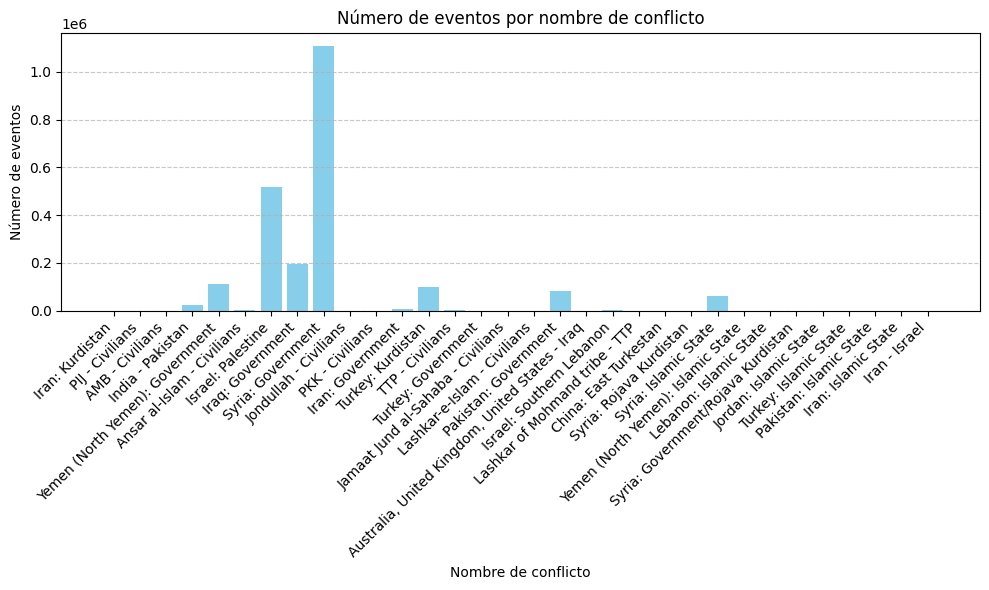

<Figure size 640x480 with 0 Axes>

In [227]:
plt.figure(figsize=(10, 6))
plt.bar(data_oriente_proximo['conflict_name'], data_oriente_proximo['conflict_count'], color='skyblue')
plt.title('Número de eventos por nombre de conflicto')
plt.xlabel('Nombre de conflicto')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
html_output = mpld3.fig_to_html(plt.gcf())

# Guardar el HTML en un archivo
with open('html/02_eventos_por_nombre_conflicto.html', 'w') as file:
    file.write(html_output)

In [202]:
data_full = pd.read_csv('docs/conflicts_events_FULL_filtered.csv', low_memory=False)
data_full.head()

,conflict_id,conflict_name,date_start,date_end,best,deaths_civilians,deaths_unknown,type_of_violence,latitude,longitude,country,region_x
0,329,Ethiopia: Ogaden,2000-01-01T00:00:00,2000-01-23T00:00:00,0,0,0,1,7.000000,44.000000,Ethiopia,4
1,327,Angola: Government,2000-01-01T00:00:00,2000-11-10T00:00:00,0,0,0,1,-13.000000,20.500000,Angola,4
2,364,India: Kashmir,2000-01-01T00:00:00,2000-10-15T00:00:00,153,0,153,1,33.916670,76.666670,India,3
3,386,Algeria: Government,2000-01-01T00:00:00,2000-01-01T00:00:00,2,0,0,1,36.855833,3.866667,Algeria,4
4,352,Chechen Republic of Ichkeria - Civilians,2000-01-01T00:00:00,2000-01-11T00:00:00,0,0,0,3,43.305800,45.747700,Russia (Soviet Union),3


In [226]:
#Year 2011: 189442 conflicts
#Year 2012: 385194 conflicts
#Year 2013: 467585 conflicts
data_full['date_start'] = pd.to_datetime(data_full['date_start'])
data_full['date_end'] = pd.to_datetime(data_full['date_end'])

# Filtrar los datos desde el año 2011 hasta finales de 2013
data_filtered = data_full[(data_full['date_start'] >= '2011-01-01') & (data_full['date_end'] <= '2013-12-31')]

data_filtered.head()

,conflict_id,conflict_name,date_start,date_end,best,deaths_civilians,deaths_unknown,type_of_violence,latitude,longitude,country,region_x
1552890,309,Sudan: Government,2011-01-01,2011-05-01,0,0,0,1,13.000000,25.000000,Sudan,4
1552891,333,Afghanistan: Government,2011-01-01,2011-01-01,1,0,0,1,31.000000,64.000000,Afghanistan,3
1552892,364,India: Kashmir,2011-01-01,2011-01-01,2,0,0,1,33.319889,75.068477,India,3
1552893,333,Afghanistan: Government,2011-01-01,2011-01-01,2,0,0,1,34.954550,70.914272,Afghanistan,3
1552894,364,India: Kashmir,2011-01-01,2011-01-31,2,0,0,1,33.916670,76.666670,India,3


In [ ]:
data_filtered.shape[0]

In [225]:
def create_heatmap():
    data_filtered['date_start'] = pd.to_datetime(data_filtered['date_start'])
   
    heatmap_time_datee_n = []
    heatmap_time_dataa_n = []
    
    grouped_data = data_filtered.groupby(data_filtered['date_start'].dt.strftime('%Y-%m-%d'))
    
    for (date), group_data in grouped_data:
        try:
            date_start_list = group_data['date_start'].tolist()
            date = date_start_list[1].strftime('%Y-%m-%d')
            heatmap_time_datee_n.append(date)
            
            # Access daily positions for the current conflict
            positions = data_filtered[(data_filtered['date_start'].dt.strftime('%Y-%m-%d') == date)].head(100)
            num_rows = positions.shape[0]
            positions_list = []
            for index, row in positions.iterrows():
                lat_lon = [row['latitude'], row['longitude']]
                positions_list.append(lat_lon)
            heatmap_time_dataa_n.append(positions_list)
        except Exception as ex:
            print(ex)
        

    map_heatmap_time = folium.Map([0, 0], tiles='CartoDB Dark_Matter', zoom_start=3)
    
    # heatmap plugin    
    heatmap_time_plugin = plugins.HeatMapWithTime(heatmap_time_dataa_n, index=heatmap_time_datee_n)
    
    # add heatmap plugin to map
    heatmap_time_plugin.add_to(map_heatmap_time)
    

    map_heatmap_time.save(f"html/03_heatmap_conflicts-2011-2013.html")
    # display map
    return map_heatmap_time

In [ ]:
mapa = create_heatmap()
display(mapa)

In [ ]:
data_filtered.head()

In [ ]:
def plot_all_data(name, data):
    # Calcular la diferencia de precio de cierre entre días consecutivos
    data['PriceChange'] = data['Adj Close'].diff()

    # Crear la figura y los ejes
    figi, (ax1, ax2) = plt.subplots(2, 1, figsize=(13.5, 9), sharex=True)

    # Gráfico de líneas para el valor de cierre ajustado (Adj Close)
    color = 'blue'
    ax1.set_ylabel('Adj Close Value ($)', color=color)
    ax1.plot(data.index, data['Adj Close'], color=color, label='Adj Close')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Gráfico de barras para el volumen (positivo y negativo)
    color = 'red'
    ax2.set_ylabel('Lost Win (Shares)', color=color)
    bars = ax2.bar(data.index, data['Volume'],
                   color=data['PriceChange'].apply(lambda x: 'red' if x < 0 else 'green'))
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_xlabel('Date')

    # Añadir texto como etiqueta en la leyenda para volúmenes negativos
    for bar in bars:
        index = bars.index(bar)
        volume = data['Volume'].iloc[index]
        date = data.index[index].strftime('%Y-%m-%d')
        if volume < 0:  # Solo para volúmenes negativos
            bar.set_label(date)  # Utiliza la fecha como etiqueta

    # Añadir título
    plt.title(f'{name} Close Value and Lost-Win')

    # Ajustar espacios entre subgráficos
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()
    html_output = mpld3.fig_to_html(plt.gcf())

    with open(f'html/04_plot_all_data_{name}.html', 'w') as file:
        file.write(html_output)

In [ ]:
data = pd.read_csv('docs/Repsol_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Repsol', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

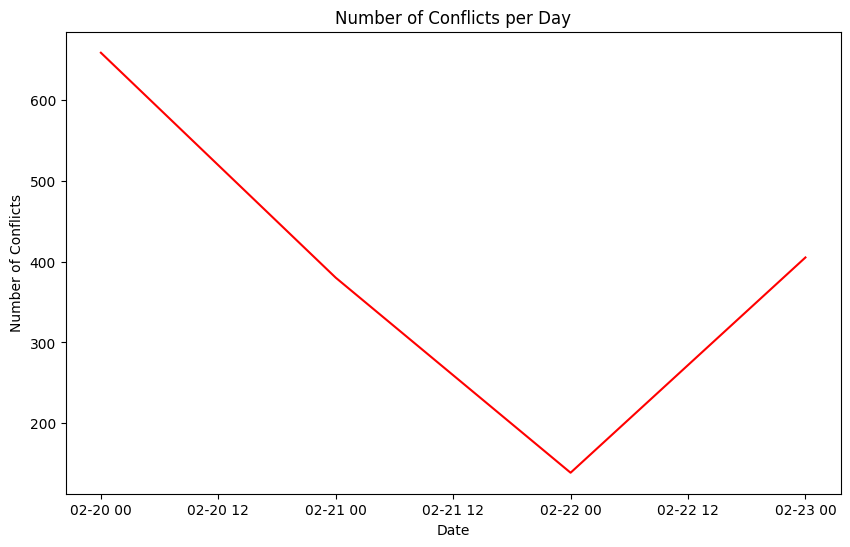

<Figure size 640x480 with 0 Axes>

In [212]:
conflicts_by_day = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')].groupby('date_start').size()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el número de conflictos por día
ax.plot(conflicts_by_day.index, conflicts_by_day.values, color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Conflicts')
ax.set_title('Number of Conflicts per Day')

# Mostrar la gráfica
plt.show()
html_output = mpld3.fig_to_html(plt.gcf())

# Guardar el HTML en un archivo
with open('html/04_number_conflicts_per_day.html', 'w') as file:
    file.write(html_output)

In [27]:
conflicts_by_day = data_filtered.groupby('date_start').size().reset_index(name='conflict_count')
conflicts_by_day_sorted = conflicts_by_day.sort_values(by="conflict_count", ascending=False)
conflicts_by_day_sorted.head()

,date_start,conflict_count
689,2012-11-20T00:00:00,2685
688,2012-11-19T00:00:00,2624
686,2012-11-17T00:00:00,2452
593,2012-08-16T00:00:00,2448
617,2012-09-09T00:00:00,2410


In [51]:
# Calcular la diferencia entre fechas consecutivas
conflicts_by_day_sorted['date_start'] = pd.to_datetime(conflicts_by_day_sorted['date_start'])
conflicts_by_day_sorted['date_diff'] = conflicts_by_day_sorted['date_start'].diff()

intervalos_fechas = conflicts_by_day_sorted[conflicts_by_day_sorted['date_diff'] > pd.Timedelta(days=1)]
intervalos_fechas.sort_values(by="date_diff", ascending=False)
# Mostrar los intervalos de fechas
print(intervalos_fechas)

    date_start  conflict_count date_diff
617 2012-09-09            2410   24 days
583 2012-08-06            2158   14 days
716 2012-12-17            2147  133 days
879 2013-05-29            2121  189 days
897 2013-06-16            2079  112 days
..         ...             ...       ...
283 2011-10-11             198  271 days
46  2011-02-16             183   10 days
312 2011-11-09             179  266 days
307 2011-11-04             166  247 days
52  2011-02-22             139   51 days

[545 rows x 3 columns]


In [149]:
def filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral):
    intervalos_filtrados = []

    for index, intervalo in intervalos_fechas.iterrows():
        fecha_inicio = intervalo['date_start'] + pd.Timedelta(days=(intervalo['date_diff'].days-2))

        fecha_fin = intervalo['date_start']+ pd.Timedelta(days=(intervalo['date_diff'].days+2))

        data_filtered = data_full[(data_full['date_start'] >= fecha_inicio) & (data_full['date_start'] < fecha_fin)]
        stock_data = data[(data['Date'] >= fecha_inicio) & (data['Date'] < fecha_fin)]

        conflicts_by_day = data_filtered.groupby('date_start').size().reset_index(name='conflict_count')
        conflicts_by_day['date_start'] = pd.to_datetime(conflicts_by_day['date_start'])

        volume_by_day = stock_data.groupby('Date')['Close'] - stock_data.groupby('Date')['Open'] 

        combined_data = pd.merge(volume_by_day, conflicts_by_day, left_on='Date', right_on='date_start', how='inner')

        correlation = combined_data['Volume'].corr(combined_data['conflict_count'])

        if correlation < umbral:
            #print(f"Correlation between stock volume and conflict count: {correlation} Interval: {fecha_inicio} - {fecha_fin}")
            intervalos_filtrados.append((fecha_inicio, fecha_fin, data_filtered, stock_data, correlation))

    return intervalos_filtrados

def filtrar_intervalos(intervalos_fechas, data_full, data, umbral):
    intervalos_filtrados = []

    for index, intervalo in intervalos_fechas.iterrows():
        fecha_inicio = intervalo['date_start'] - pd.Timedelta(days=2)
        fecha_fin = intervalo['date_start'] + pd.Timedelta(days=2)

        data_filtered = data_full[(data_full['date_start'] >= fecha_inicio) & (data_full['date_start'] < fecha_fin)]
        stock_data = data[(data['Date'] >= fecha_inicio) & (data['Date'] < fecha_fin)]

        conflicts_by_day = data_filtered.groupby('date_start').size().reset_index(name='conflict_count')
        conflicts_by_day['date_start'] = pd.to_datetime(conflicts_by_day['date_start'])

        volume_by_day = stock_data.groupby('Date')['Close'] - stock_data.groupby('Date')['Open'] 

        combined_data = pd.merge(volume_by_day, conflicts_by_day, left_on='Date', right_on='date_start', how='inner')

        correlation = combined_data['Volume'].corr(combined_data['conflict_count'])

        if correlation < umbral:
            #print(f"Correlation between stock volume and conflict count: {correlation} Interval: {fecha_inicio} - {fecha_fin}")
            intervalos_filtrados.append((fecha_inicio, fecha_fin, data_filtered, stock_data, correlation))

    return intervalos_filtrados


In [150]:
umbral = -0.5 
days_before= 2
datos_filtrados_por_intervalo = []
data_full['date_start'] = pd.to_datetime(data_full['date_start'])

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    


C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

In [151]:
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

Porcentaje de intervalos con correlación < -0.5: 38.35%


In [152]:
import ipywidgets as widgets
from folium import folium, plugins
from ipywidgets import interact

data = pd.read_csv('docs/Acciona_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Acciona', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));


interactive(children=(Text(value='Acciona', description='Stock Name:'), Output()), _dom_classes=('widget-inter…

In [153]:
umbral = -0.5 

data = pd.read_csv('docs/Acciona_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos con correlación < -0.5: 38.35%


In [154]:
umbral = -0.5 

data = pd.read_csv('docs/Acciona_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos que tienen buenos resultados al final con correlación < -0.5: 25.32%


In [155]:
import ipywidgets as widgets
from folium import folium, plugins
from ipywidgets import interact

data = pd.read_csv('docs/Enagas_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Enagas', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Enagas', description='Stock Name:'), Output()), _dom_classes=('widget-intera…

In [156]:
umbral = -0.5 

data = pd.read_csv('docs/Enagas_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos con correlación < -0.5: 41.10%


In [157]:
umbral = -0.5 

data = pd.read_csv('docs/Enagas_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos que tienen buenos resultados al final con correlación < -0.5: 27.89%


In [158]:
import ipywidgets as widgets
from folium import folium, plugins
from ipywidgets import interact

data = pd.read_csv('docs/Exxon Mobil Corporation_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Exxon Mobil Corporation_data', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Exxon Mobil Corporation_data', description='Stock Name:'), Output()), _dom_c…

In [159]:
umbral = -0.5 

data = pd.read_csv('docs/Exxon Mobil Corporation_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos con correlación < -0.5: 38.72%


In [160]:
umbral = -0.5 

data = pd.read_csv('docs/Exxon Mobil Corporation_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos que tienen buenos resultados al final con correlación < -0.5: 26.24%


In [161]:
import ipywidgets as widgets
from folium import folium, plugins
from ipywidgets import interact

data = pd.read_csv('docs/Honeywell International Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Honeywell International Inc', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Honeywell International Inc', description='Stock Name:'), Output()), _dom_cl…

In [162]:
umbral = -0.5 

data = pd.read_csv('docs/Honeywell International Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos con correlación < -0.5: 39.08%


In [163]:
umbral = -0.5 

data = pd.read_csv('docs/Honeywell International Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos que tienen buenos resultados al final con correlación < -0.5: 25.50%


In [164]:
import ipywidgets as widgets
from folium import folium, plugins
from ipywidgets import interact

data = pd.read_csv('docs/Iberdrola_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Iberdrola', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Iberdrola', description='Stock Name:'), Output()), _dom_classes=('widget-int…

In [165]:
umbral = -0.5 

data = pd.read_csv('docs/Iberdrola_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos con correlación < -0.5: 35.41%


In [167]:
umbral = -0.5 

data = pd.read_csv('docs/Iberdrola_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos que tienen buenos resultados al final con correlación < -0.5: 23.67%


In [166]:
import ipywidgets as widgets
from folium import folium, plugins
from ipywidgets import interact

data = pd.read_csv('docs/Kinder Morgan, Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Kinder Morgan, Inc._data', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Kinder Morgan, Inc._data', description='Stock Name:'), Output()), _dom_class…

In [168]:
umbral = -0.5 

data = pd.read_csv('docs/Kinder Morgan, Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos con correlación < -0.5: 37.61%


In [169]:
umbral = -0.5 

data = pd.read_csv('docs/Kinder Morgan, Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos que tienen buenos resultados al final con correlación < -0.5: 27.89%


In [170]:
import ipywidgets as widgets
from folium import folium, plugins
from ipywidgets import interact

data = pd.read_csv('docs/NextEra Energy, Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='NextEra Energy, Inc._data.csv', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='NextEra Energy, Inc._data.csv', description='Stock Name:'), Output()), _dom_…

In [171]:
umbral = -0.5 

data = pd.read_csv('docs/NextEra Energy, Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos con correlación < -0.5: 38.35%


In [172]:
umbral = -0.5 

data = pd.read_csv('docs/NextEra Energy, Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos que tienen buenos resultados al final con correlación < -0.5: 27.52%


In [173]:
import ipywidgets as widgets
from folium import folium, plugins
from ipywidgets import interact

data = pd.read_csv('docs/Solaredge Technologies Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Solaredge Technologies Inc._data', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Solaredge Technologies Inc._data', description='Stock Name:'), Output()), _d…

In [174]:
umbral = -0.5 

data = pd.read_csv('docs/Solaredge Technologies Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

Porcentaje de intervalos con correlación < -0.5: 0.00%


In [175]:
umbral = -0.5 

data = pd.read_csv('docs/Solaredge Technologies Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación < {umbral}: {porcentaje_buenos:.2f}%")

Porcentaje de intervalos que tienen buenos resultados al final con correlación < -0.5: 0.00%


In [176]:
import ipywidgets as widgets
from folium import folium, plugins
from ipywidgets import interact

data = pd.read_csv('docs/Solaria_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Solaria_data', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Solaria_data', description='Stock Name:'), Output()), _dom_classes=('widget-…

In [177]:
umbral = -0.5 

data = pd.read_csv('docs/Solaria_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos con correlación < -0.5: 37.43%


In [178]:
umbral = -0.5 

data = pd.read_csv('docs/Solaria_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos que tienen buenos resultados al final con correlación < -0.5: 26.79%


In [179]:
import ipywidgets as widgets
from folium import folium, plugins
from ipywidgets import interact

data = pd.read_csv('docs/Técnicas Reunidas_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Técnicas Reunidas_data.csv', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Técnicas Reunidas_data.csv', description='Stock Name:'), Output()), _dom_cla…

In [180]:
umbral = -0.5 

data = pd.read_csv('docs/Técnicas Reunidas_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos con correlación < -0.5: 42.20%


In [181]:
umbral = -0.5 

data = pd.read_csv('docs/Técnicas Reunidas_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2013-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación < {umbral}: {porcentaje_buenos:.2f}%")

C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pablo\AppData\Local\Programs\Pytho

Porcentaje de intervalos que tienen buenos resultados al final con correlación < -0.5: 31.01%
